In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

ModuleNotFoundError: No module named 'numpy'

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
X = data.iloc[:,:-1]

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
y = data.iloc[:,-1]

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [9]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

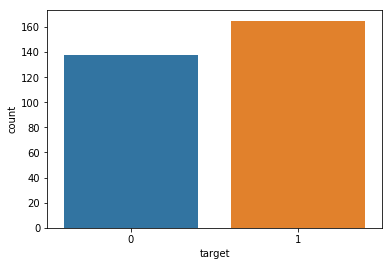

In [11]:
sns.countplot(x='target',data=data)
plt.show()

In [12]:
X_train.shape

(242, 13)

In [13]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [14]:
y_test.shape

(61,)

In [15]:
y_test.head()

204    0
159    1
219    0
174    0
184    0
Name: target, dtype: int64

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

c:\users\renuka\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
filename = 'heartdisease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn import metrics
print("Accuracy is:",metrics.accuracy_score(y_pred,y_test)*100)

Accuracy is: 75.40983606557377


In [20]:
print("Confusion Matrix is: ",metrics.confusion_matrix(y_pred,y_test))

Confusion Matrix is:  [[20  5]
 [10 26]]
